# 1. Logistic regression

## Problem 1

Consider the average empirical loss (the risk) for logistic regression:

$$
J(\theta)=\frac{1}{m} \sum_{i=1}^m \log(1 + e^{-y^{(i)}\theta^T x^{(i)}}) = - \frac{1}{m} log(h_\theta (y^{(i)} x^{(i)}))\tag{1}
$$

Where $y^{(i)}  \in \{-1,1\}, h_\theta(x)=g(\theta^Tx)$ and $g(z) = 1/(1+e^{-z})$. Find the Hessian H of this function, and show that for any vector z, it holds true that

$$
z^THz \ge 0 \tag{2}
$$

### My Solution

We know that the Hessain matrix is the second order partial derivative of the function $J(\theta)$. Therefore the first order partial derivative: the gradient matrix should be computed firstly.

The offical gradient of a matrix function is defined as below:

$$
\nabla f(x)= \begin{bmatrix}
    \frac{\partial}{\partial x_1}f(x)\\
    \vdots \\
    \frac{\partial}{\partial x_n}f(x)\\
\end{bmatrix} \tag{3}
$$

where

$$
x = \begin{bmatrix}
    x_1 \\
    \vdots \\
    x_n \\
\end{bmatrix}
$$

So We computed the first order partial derivative $J(\theta)$ against $\theta_j$

$$
\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m} \sum_{i=1}^m \frac{e^{-y^{(i)}\theta^T x^{(i)}}}{1 + e^{-y^{(i)}\theta^T x^{(i)}}} (-y^{(i)}x^{(i)}_k) \tag{4}
$$

And we also know that:

$$
g(-y^{(i)}\theta^T x^{(i)})=sigmoid(-y^{(i)}\theta^T x^{(i)}) = h_\theta(-y^{(i)} x^{(i)}) \tag{5}
$$

$$
\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m} \sum_{i=1}^m h_\theta(-y^{(i)} x^{(i)}) (-y^{(i)} x^{(i)}_j) \tag{6}
$$

So the gradient of $J(\theta)$

$$
\nabla J(\theta) = \frac{1}{m} \sum_{i=1}^m h_\theta(-y^{(i)} x^{(i)}) (-y^{(i)} x^{(i)}) \tag{7}
$$

Now let's compute the Hessian matrix, before getting the final target, the derivative of the sigmoid function should be clear:

We know that $g(z) = 1/(1+e^{-z})$, then we omit some simple calculations:

$$
g'(z) = g(z)(1 - g(z)) \tag{8}
$$

Now with the direct result of sigmoid's derivative, the second order derivative of $J(\theta)$ against$\theta_k$ and $\theta_l$:

$$
\frac{\partial^2 J(\theta)}{\partial \theta_k \partial \theta_l}=\frac{1}{m} \sum_{i=1}^m h_\theta(-y^{(i)} x^{(i)})(1 - h_\theta(-y^{(i)}x^{(i)})(-y^{(i)}x^{(i)}_k)(-y^{(i)}x^{(i)}_l) \tag{9}
$$

We can know that $h_\theta(-y^{(i)} x^{(i)})(1 - h_\theta(-y^{(i)}))$ is the even function, and  because $y^{(i)}  \in \{-1,1\}$, we can eliminate all $y^{(i)}$s. Therefore the simpler version is below:

$$
\frac{\partial^2 J(\theta)}{\partial \theta_k \partial \theta_l}=\frac{1}{m} \sum_{i=1}^m h_\theta(x^{(i)})(1 - h_\theta(x^{(i)})x^{(i)}_k x^{(i)}_l \tag{10}
$$

## Problem 2

We have provided two data files:
- logistic_x.txt
- logistic_y.txt

These files contain the inputs $(x^{(i)} \in R^2)$ and outputs $(y(i) \in \{−1, 1\})$, respectively for a binary classification problem, with one training example per row. Implement Newton’s method for optimizing $J(\theta)$, and apply it to fit a logistic regression model to the data. Initialize Newton’s method with $\theta = 0$ (the vector of all zeros). What are the coefficients $\theta$ resulting from your fit? (Remember to include the intercept term.)

### My Solution 

Let's load the dataset firstly:

In [21]:
import numpy as np
from mohism_utils import sigmoid
import matplotlib.pyplot as plt

def load_dataset():
    train_X = np.loadtxt('logistic_x.txt')
    train_Y = np.loadtxt('logistic_y.txt')
    train_Y = train_Y.reshape(1, -1)
    return train_X.T, train_Y

In [22]:
train_X, train_Y = load_dataset()
print("train_X:Size:" + str(train_X.shape))
print("train_Y:Size:" + str(train_Y.shape))

train_X:Size:(2, 99)
train_Y:Size:(1, 99)


In [23]:
def initialize_with_zeros(dim):
    theta = np.zeros((dim, 1))
    b = 0
    return theta, b

In [24]:
def compute_gradient(X, Y, w, b):
    """
    Arguments:
    X -- data of size (2, number of examples)
    Y -- true "label" vector (containing -1 or 1) of size (1, number of examples) 
    w -- weights, a numpy array of size (2, 1)
    b -- scalor, bias
    """
    m = Y.shape[1]
    X = np.row_stack((X, np.ones((1, m))))
    theta = np.row_stack((w, b))
    Y_computed = np.dot(theta.T, X)
    Z = sigmoid(- Y * Y_computed)
    Y_m_X = - Y * X
    ret = np.dot(Z, Y_m_X.T)
    return ret/m

In [25]:
X = np.array([[1.,2.,-1.],[3.,4.,-3.2]])
Y = np.array([[1,-1,1]])
w, b = np.array([[1.],[2.]]), 2.

print("w size=" + str(w.shape))
print("X size=" + str(X.shape))
print("Y size=" + str(Y.shape))

gradient = compute_gradient(X, Y, w, b)
print("Gradient=" + str(gradient))

w size=(2, 1)
X size=(2, 3)
Y size=(1, 3)
Gradient=[[  9.98456015e-01   2.39507239e+00   1.45557814e-03]]


In [26]:
def compute_hessian(X, w, b):
    """
    Arguments:
    X -- data of size (2, number of examples)
    w -- weights, a numpy array of size (2, 1)
    b -- scalor, bias
    """
    m = X.shape[1]
    X = np.row_stack((X, np.ones((1, m))))
    theta = np.row_stack((w, b))
    sm =  sigmoid(np.dot(theta.T, X))
    derivative_sm = sm * (1 - sm)
    diag_d_sm = np.diag(derivative_sm.flatten())
    hessian = np.dot(X, diag_d_sm)
    hessian = np.dot(hessian, X.T)
    return hessian / m

In [27]:
X = np.array([[1.,2.,-1.],[3.,4.,-3.2]])
Y = np.array([[1,-1,1]])
w, b = np.array([[1.],[2.]]), 2.

print("w size=" + str(w.shape))
print("X size=" + str(X.shape))
print("Y size=" + str(Y.shape))

gradient = compute_gradient(X, Y, w, b)
print("Gradient=" + str(gradient))
hessian = compute_hessian(X, w, b)
print("Hessian=" + str(hessian))

w size=(2, 1)
X size=(2, 3)
Y size=(1, 3)
Gradient=[[  9.98456015e-01   2.39507239e+00   1.45557814e-03]]
Hessian=[[ 0.00154134  0.00491422 -0.0014468 ]
 [ 0.00491422  0.01568118 -0.00464289]
 [-0.0014468  -0.00464289  0.00153519]]


In [28]:
def logistic_regression(X, Y):
    """
    Arguments:
    X -- data of size (2, number of examples)
    Y -- true "label" vector (containing -1 or 1) of size (1, number of examples) 
    """
    dim = X.shape[0]
    w, b = initialize_with_zeros(dim)
    theta = np.row_stack((w, b))

    while True:
        gradient = compute_gradient(X, Y, theta[0:2], theta[2])
        hessian = compute_hessian(X, theta[0:2], theta[2])

        if np.less(np.fabs(gradient), np.array([0.0001, 0.0001, 0.0001])).all():
            break
        theta = theta - np.dot(np.linalg.inv(hessian), gradient.T)
        
    return theta[0:2], theta[2]

In [29]:
w, b = logistic_regression(train_X, train_Y)
print("final:w=" + str(w))
print("final:b=" + str(b))

final:w=[[ 0.76037096]
 [ 1.17194549]]
final:b=[-2.62050954]


## Problem 3

Plot the training data (your axes should be x1 and x2, corresponding to the two
coordinates of the inputs, and you should use a different symbol for each point plotted to
indicate whether that example had label 1 or -1). Also plot on the same figure the decision
boundary fit by logistic regression. (This should be a straight line showing the boundary
separating the region where $h_\theta(x) > 0.5$ from where $h_\theta(x) ≤ 0.5$.)

### Solution

x_min=-0.42920059
x_max=8.7054006


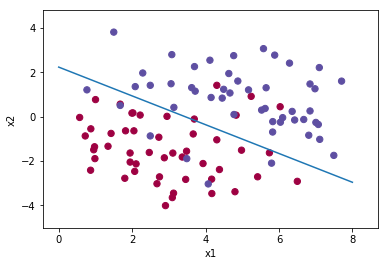

In [30]:
h = 0.02
x_min, x_max = train_X[0, :].min() - 1, train_X[0, :].max() + 1
y_min, y_max = train_X[1, :].min() - 1, train_X[1, :].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Draw data points 
fig = plt.figure()
plt.scatter(train_X[0, :], train_X[1, :], c=train_Y[0,:], s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.ylabel('x2')
plt.xlabel('x1')

print("x_min=" + str(x_min))
print("x_max=" + str(x_max))

# Draw classifier line
x1 = 0
y1 = - (w[0] * x1 + b) / w[1]
x2 = 8
y2 = - (w[0] * x2 + b) / w[1]

plt.plot([x1, x2], [y1, y2])
plt.show()

# 5 Regression for denoising quasar spectra

## Introduction 

In this problem, we will apply a supervised learning technique to estimate the
light spectrum of quasars. Quasars are luminous distant galactic nuclei that are so bright, their
light overwhelms that of stars in their galaxies. Understanding properties of the spectrum of
light emitted by a quasar is useful for a number of tasks: first, a number of quasar properties
can be estimated from the spectra, and second, properties of the regions of the universe through
which the light passes can also be evaluated (for example, we can estimate the density of neutral
and ionized particles in the universe, which helps cosmologists understand the evolution and
fundamental laws governing its structure). The light spectrum is a curve that relates the light’s
intensity (formally, lumens per square meter), or luminous flux, to its wavelength. Figure 1
shows an example of a quasar light spectrum, where the wavelengths are measured in Angstroms
($ \unicode{x212B} $), where $1 \unicode{x212B}= 10^{−10} meters $.

## Getting the data

We will be using data generated from the Hubble Space Telescope Faint
Object Spectrograph (HST-FOS), Spectra of Active Galactic Nuclei and Quasars.5 We have
provided two comma-separated data files located at:

- Training set: quasar_train.csv
- Test set: quasar_test.csv

Each file contains a single header row containing 450 numbers corresponding integral wavelengths
in the interval $[1150, 1600] \unicode{x212B} $. The remaining lines contain relative flux measurements for each
wavelength. Specifically, quasar train.csv contains 200 examples and quasar test.csv con-
tains 50 examples.

In [1]:
import csv
import numpy as np

def load_quasar_data():
    train_data = np.loadtxt('quasar_train.csv', dtype=np.float, delimiter=",")
    light_lambdas = train_data[0]
    light_lambdas = light_lambdas.reshape(1, -1)
    #print("light_lambdas=" + str(light_lambdas))
    train_qso = train_data[1:]
    test_data = np.loadtxt('quasar_test.csv', dtype=np.float, delimiter=",")
    test_qso = test_data[1:]
    return light_lambdas, train_qso, test_qso

In [2]:
# Load the data
light_lambdas, train_qso, test_qso = load_quasar_data()
print("light_lambdas: shape" + str(light_lambdas.shape))
print("train_qso: shape" + str(train_qso.shape))
print("test_qso: shape" + str(test_qso.shape))

light_lambdas: shape(1, 450)
train_qso: shape(200, 450)
test_qso: shape(50, 450)


## a. Locally weighted linear regression

Consider a linear regression problem in which we want to “weight” different training examples differently. Specifically, suppose we want to minimize

$$ J(\theta)=\frac{1}{2} \sum_{i=1}^m w^{(i)} (\theta^T x^{(i)} - y^{(i)})^2 \tag{5.1} $$

In class, we worked out what happens for the case where all the weights (the $w^{(i)}$’s) are the same. In this problem, we will generalize some of those ideas to the weighted setting.

### i 

Show that $J(\theta)$ can also be written

$$
J(\theta) = (X \theta - Y)^T W (X \theta - Y) \tag{5.2}
$$

for an appropriate diagonal matrix W, and where X and Y are as defined in class. State
clearly what W is.

#### Solution

Let's define the design matrix X to be the m-by-n matrix

$$
X = \begin{bmatrix}
    (x^{(1)})^T \\
    (x^{(2)})^T \\
    \vdots \\
    (x^{(m)})^T \\
\end{bmatrix}
$$

And let Y be the m-dimensional vector containning all the target values from the trainning set:

$$
Y = \begin{bmatrix}
    y^{(1)} \\
    y^{(2)} \\
    \vdots  \\
    y^{(m)} \\
\end{bmatrix}
$$

Now since $h_\theta(x^{(i)}) = (x^{(i)})^T \theta$ We can easily verify that 

$$
X\theta - Y = \begin{bmatrix}
              (x^{(1)})^T \theta \\
              (x^{(2)})^T \theta \\
              \vdots \\
              (x^{(m)})^T \theta \\
              \end{bmatrix}
- \begin{bmatrix}
    y^{(1)}  \\
    y^{(2)}  \\
    \vdots   \\
    y^{(m)}  \\
\end{bmatrix}
$$

$$
= \begin{bmatrix}
   h_\theta(x^{(1)}) - y^{(1)} \\
   h_\theta(x^{(2)}) - y^{(2)} \\
    \vdots  \\
   h_\theta(x^{(m)}) - y^{(m)} \\
\end{bmatrix}
$$

Then we design a W matrix with m-by-m:

$$
W = \begin{bmatrix}
   w^{(1)} &0   &\dots &0\\
   0 & w^{(2)}  &\dots &0 \\
   \vdots &\vdots &\ddots &0\\
   0 &0  &\dots &w^{(m)}\\
\end{bmatrix}
$$

because of the fact that $z^Tz = \sum_i z^2_i$:

$$
\frac{1}{2} (X\theta - Y)^T W (X\theta - Y) = \frac{1}{2} \sum_{i=1}^m w^{(i)} (\theta^T x^{(i)} - y^{(i)})^2
$$

### ii

If all the $w^{(i)}$’s equal 1, then we saw in class that the normal equation is

$$X^TX\theta=X^TY \tag{5.3}$$

and that the value of θ that minimizes $J(\theta)$ is given by $(X^TX)^{−1}X^T Y$. By finding
the derivative $\nabla_\theta J(\theta)$ and setting that to zero, generalize the normal equation to this weighted setting, and give the new value of θ that minimizes $J(\theta)$ in closed form as a function of X, W and Y.

### iii

Suppose we have a training set $\{(x^{(i)}, y^{(i)}); i=1...m\}$, of m independent
examples, but in which the $y^{(i)}$’s were observed with differing variances. Specifically,
suppose that

$$
P(y^{(i)} \mid x^{(i)} ; \theta)= \frac{1}{\sqrt{2\pi} \sigma^{(i)}} exp(-\frac{(\theta^T x^{(i)} - y^{(i)})^2}{2 (\sigma^{(i)})^2})
$$

## b. Visualizing the data

### i

Use the normal equations to implement (unweighted) linear regression ($y = \theta^T x$) on the first training example (i.e. first non-header row). On one figure, plot both the raw data and the straight line resulting from your fit. State the optimal $\theta$ resulting from the linear regression. Remember the intercept term (your optimal $\theta$ should lie in $R^2$).

In [3]:
import matplotlib.pyplot as plt

def draw_one_example(x, y, theta):
    h = 0.02
    #x_min, x_max = x.min(), x.max()
    #y_min, y_max = y.min() - 1, y.max() + 1
    #xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Draw data points 
    fig = plt.figure()
    plt.scatter(x, y, s=10)
    #plt.xlim(xx.min(), xx.max())
    #plt.ylim(yy.min(), yy.max())

    plt.ylabel('Flux')
    plt.xlabel('Wavelength')

    #print("x shape=" + str(x.shape))
    # Draw classifier line
    x1 = x[:, 0]
    y1 = theta[0] * x1 + theta[1]
    x2 = x[:, -1]
    y2 = theta[0] * x2 + theta[1]

    #print("x1=" + str(x1))
    #print("x2=" + str(x2))
    plt.plot([x1, x2], [y1, y2], color='red')
    plt.show()

In [4]:
def lw_linear_regression(x ,y):
    ones_row = np.ones(x.shape)
    data_x = np.row_stack((x, ones_row))
    data_x = data_x.T
    data_y = y.T
    #print("data_x shape=" + str(data_x.shape))
    #print("data_x=" + str(data_x))
    xx = np.dot(data_x.T, data_x)
    xx_inv = np.linalg.inv(xx)
    temp = np.dot(xx_inv, data_x.T)
    theta = np.dot(temp, data_y)
    return theta

theta=[[ -9.81122145e-04]
 [  2.51339906e+00]]


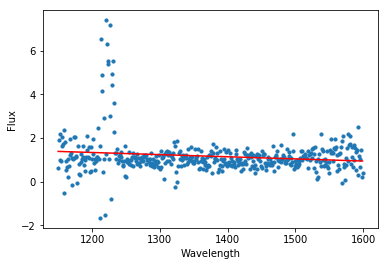

In [5]:
axis_x_data = light_lambdas
asix_Y_data = train_qso[0].reshape(1, -1)

#print("axis_x_data shape=" + str(axis_x_data.shape))
#print("asix_Y_data shape=" + str(asix_Y_data.shape))

theta = lw_linear_regression(axis_x_data, asix_Y_data)

print("theta=" + str(theta))

draw_one_example(axis_x_data, asix_Y_data, theta)

### ii

Implement locally weighted linear regression on the first training example.
Use the normal equations you derived in part (a)(ii). On a different figure, plot both
the raw data and the smooth curve resulting from your fit. When evaluating h(·) at a
query point x, use weights

$$
w^{(i)} = exp(- \frac{(x - x^{(i)})^2}{2\tau^2})
$$

with bandwidth parameter $\tau = 5$

In [6]:
def local_linear_regression(query_point, x ,y, tau):
    ones_row = np.ones(x.shape)
    data_x = np.row_stack((x, ones_row))
    data_x = data_x.T
    data_y = y.T
    
    # compute w matrix
    w_xxi = np.power((query_point - x), 2)
    w = np.exp(- w_xxi / (2*tau*tau))
    #print("w shape=" + str(w.shape))
    W = np.diag(w.flatten())
    #print("W shape=" + str(W.shape))

    xx = np.dot(data_x.T, W)
    xx = np.dot(xx, data_x)
    xx_inv = np.linalg.inv(xx)
    temp = np.dot(xx_inv, data_x.T)
    temp = np.dot(temp, W)
    theta = np.dot(temp, data_y)
    return theta[0]*query_point + theta[1]

In [7]:
def draw_one_lwr(x, y, tau):
    # Draw data points 
    fig = plt.figure()
    plt.scatter(x, y, s=10)

    plt.ylabel('Flux')
    plt.xlabel('Wavelength')
    plt.title('tau=' + str(tau))
    #print("x shape=" + str(x.shape))
    # Draw classifier line
    m = x.shape[1]
    x1 = x[:, 0]
    y1 = local_linear_regression(x1, x, y, tau)
    for index in range(1, m):
        x2 = x[:, index]
        y2 = local_linear_regression(x2, x, y, tau)
        plt.plot([x1, x2], [y1, y2], color='red')
        x1 = x2
        y1 = y2

    plt.show()

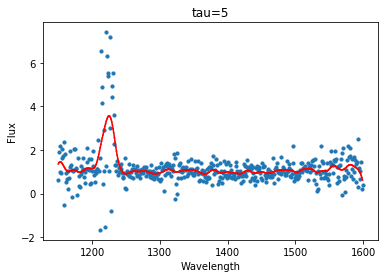

In [8]:
axis_x_data = light_lambdas
asix_Y_data = train_qso[0].reshape(1, -1)
draw_one_lwr(axis_x_data, asix_Y_data, 5)

### iii

Repeat (b)(ii) four more times with $\tau$ = 1, 10, 100 and 1000. Plot the resulting
curves. You can submit one plot with all four $\tau$ values or submit four separate plots. If
you submit one plot, make sure all curves are visible. Additionally, in 2-3 sentences,
comment on what happens to the locally weighted linear regression line as $\tau$ varies.

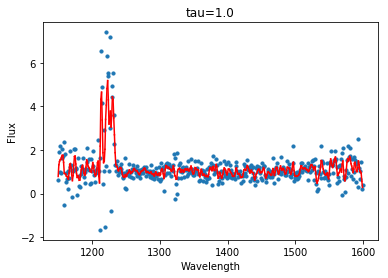

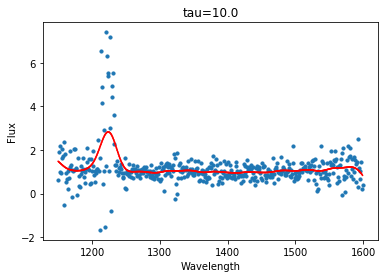

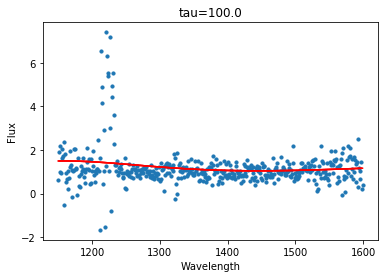

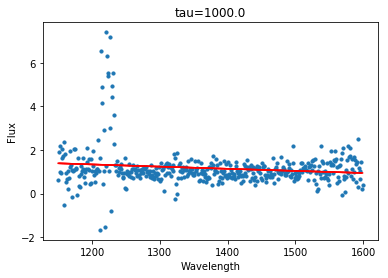

In [9]:
axis_x_data = light_lambdas
asix_Y_data = train_qso[0].reshape(1, -1)

draw_one_lwr(axis_x_data, asix_Y_data, 1.0)
draw_one_lwr(axis_x_data, asix_Y_data, 10.0)
draw_one_lwr(axis_x_data, asix_Y_data, 100.0)
draw_one_lwr(axis_x_data, asix_Y_data, 1000.0)

## C. Predicting quasar spectra with functional regression

We now go a step beyond what we have covered explicitly in class, and we wish to predict
an entire part of a spectrum—a curve—from noisy observed data. We begin by supposing
that we observe a random sample of m absorption-free spectra, which is possible for quasars
very close (in a sense relative to the size of the universe!) to Earth. For a given spectrum f,
define fright to be the spectrum to the right of the Lyman-α line. Let fleft be the spectrum
within the Lyman-α forest region, that is, for lower wavelengths. To make the results
cleaner, we define:

$$ 
f(\lambda)=\left\{
           \begin{aligned}
           f_{left}(\lambda)  \quad if\ \lambda < 1200\\
           f_{right}(\lambda) \quad if\ \lambda \ge 1300 \\
\end{aligned}
\right.
$$

We will learn a function r (for regression) that maps an observed $f_{right}$ to an unobserved target $f_{left}$ (note that $f_{left}$ and $f_{right}$ don’t cover the entire spectrum). This is useful in practice because we observe $f_{right}$ with only random noise: there is no systematic absorption, which we cannot observe directly, because hydrogen does not absorb photons with higher wavelengths. By predicting $f_{left}$ from a noisy version of $f_{right}$, we can estimate the unobservable spectrum of a quasar as well as the absorption function. Imaging systems collect data of the form

$$
f_{obs}(\lambda)=absorption(\lambda) \cdot f(\lambda) + noise(\lambda)
$$

### i

First, we must smooth the data in the training dataset to make it more useful for prediction. For each i = 1, . . . ,m, define $f^{(i)}(\lambda)$ to be the weighted linear regression estimate the ith spectrum. Use your code from part (b)(ii) above to smooth all spectra in the training set using $\tau=5$. Do the same for the test set. Apply smoothing to the
entire spectrums (including both fleft and fright) for both train and test. We will now
operate on these smoothed spectra.

In [10]:
def smooth_oneline_lwr(x, y, tau):
    m = x.shape[1]
    smoothed_y = np.zeros(y.reshape(1, -1).shape)
    #print("x shape=" + str(x.shape))
    #print("smoothed_y shape=" + str(smoothed_y.shape))
    for i in range(m):
        smoothed_y[:, i] = local_linear_regression(x[:, i], x, y, tau)

    return smoothed_y

In [51]:
smoothed_train = np.zeros(train_qso.shape)
smoothed_test = np.zeros(test_qso.shape)

print("smoothed_train shape=" + str(smoothed_train.shape))
print("smoothed_test shape=" + str(smoothed_test.shape))
print("smoothed_train[0, :] shape=" + str(smoothed_train[0, :].shape))

tau = 5
#Smooth the train data
m_train = smoothed_train.shape[0]
for i in range(m_train):
    smoothed_train[i, :] = smooth_oneline_lwr(light_lambdas, train_qso[i, :], tau)

#Smooth the test data
m_test = smoothed_test.shape[0]
for i in range(m_test):
    smoothed_test[i, :] = smooth_oneline_lwr(light_lambdas, test_qso[i, :], tau)
    
np.savetxt('quasar_train_smooth.csv', smoothed_train, delimiter=',')
np.savetxt('quasar_test_smooth.csv', smoothed_test, delimiter=',')



smoothed_train shape=(200, 450)
smoothed_test shape=(50, 450)
smoothed_train[0, :] shape=(450,)


### ii

Using your estimated regression functions $f(i)$ for i = 1, . . . ,m, we now wish to estimate the unobserved spectrum $f_{left}$ of a quasar from its (noisy) observed spectrum $f_{right}$. To do so, we perform a weighted regression of the locally weighted regressions. In particular, given a new noisy spectrum observation:

$$
f_{obs}(\lambda) = f(\lambda) + noise(\lambda) \quad for\ \lambda \in \{1300, \dots, 1599 \}
$$

We define a metric d which takes as input, two spectra $f_1$ and $f_2$, and outputs a scalar:

$$
d(f_1, f_2) =  \sum_{i} (f_1(\lambda_i) - f_2(\lambda_i))^2
$$

The metric d computes squared distance between the new datapoint and previous datapoints. If $f_1$ and $f_2$ are right spectra, then we take the preceding sum only over $\lambda \in \{1300, \dots , 1599\}$, rather than the entire spectrum.

In [96]:
def squared_distance(s1, s2, side = "right"):
    s1 = s1.reshape(1, -1)
    s2 = s2.reshape(1, -1)

    if side == "left":
        p1 = s1[:, 0:50]
        p2 = s2[:, 0:50]
    elif side == "right":
        p1 = s1[:, -300:]
        p2 = s2[:, -300:]
    return np.sum((p1 - p2)**2)

In [97]:
print("smoothed_train shape=" + str(smoothed_train.shape))
#print("smoothed_train=" + str(smoothed_train))
distance = squared_distance(smoothed_train[0], smoothed_train[1])
print("The distance between 0 and 1=" + str(distance))

smoothed_train shape=(200, 450)
The distance between 0 and 1=2.5989276597


In [98]:
def k_nearest_regression(target, data ,k):
    #print("target_index=" + str(target_index))
    m = data.shape[0]
    distance_array = np.zeros(m)
    cnt = 0;
    for i in range(m):
        distance_array[cnt] = squared_distance(target, data[i])
        cnt += 1

    #print("distance_array=" + str(distance_array))
    indices = np.argsort(distance_array)
    distance_array.sort()
    #print("distance_array=" + str(distance_array))
    #return indices[1:k + 1], distance_array[1:k + 1], distance_array[m - 1]
    return indices[0 : k], distance_array[0 : k], distance_array[m - 1]

In [99]:
indices, knn, max_dist = k_nearest_regression(smoothed_train[0], smoothed_train, 3)
print("indices=" + str(indices))
print("knn=" + str(knn))
print("max_dist=" + str(max_dist))

indices=[  0  63 177]
knn=[ 0.          1.89970314  2.04114252]
max_dist=9.02694425712


In [115]:
def kernel(t):
    return np.maximum(1 - t, 0)

def spectrum_est_regression(train_data, test_data, k_number = 3):
    # 0-49 is mapping 1150-1199-->left
    # 150-449 is mapping 1300-1599-->right
    m = test_data.shape[0]
    estimated_left = np.zeros((m, 50))
    for i in range(m):
        indices, distances, h = k_nearest_regression(test_data[i], train_data, k_number)
        denominator = np.sum(kernel(np.divide(distances, h)))
        ker = kernel(np.divide(distances, h))
        ker = ker.reshape(1, -1)
        #print("ker shape=" + str(ker.shape))
        left_f = train_data[indices[0], 0:50]
        for k in range(1, k_number):
            left_f = np.row_stack((left_f, train_data[indices[k], 0:50]))
        #print("left_f shape=" + str(left_f.shape))
        estimated_left[i, :] = np.divide(np.dot(ker, left_f), denominator)
        
    return estimated_left

In [116]:
def get_error(truth, prediction):
    m = truth.shape[0]
    error = np.zeros((m,1))
    for i in range(0,m):
        error[i] = squared_distance(truth[i], prediction[i], side = 'left')
    return np.divide(np.sum(error), m)

In [117]:
est_left = spectrum_est_regression(smoothed_train, smoothed_train, 3)
true_error = get_error(smoothed_train, est_left)
print("train true_error=" + str(true_error))

true_error=1.06639580236


### iii

Perform functional regression on the test set using the same procedure as in the previous subquestion. Note: You must use neighbors $f^{(i)}_{right}$, $f^{(i)}_{left}$ from the training
set, and $f_{right}$ in the test set to predict the corresonding $f_{left}$ in the test set. What is your average test error? For test examples 1 and 6, include a plot with both the entire smooth spectrum and the fitted curve curve $\widehat{f_{left}}$ on the same graph. You should submit two plots: one for test example 1 and one for test example 6.

In [137]:
test_est_left = spectrum_est_regression(smoothed_train, smoothed_test, 3)
true_error = get_error(smoothed_test, test_est_left)
print("test true_error=" + str(true_error))

test true_error=2.70996957938


In [138]:
def draw_one_fr(x, y, curve_y, title = 'Curve'):
    fig = plt.figure()

    plt.ylabel('Flux')
    plt.xlabel('Wavelength')
    plt.title(title)

    # Draw smoothed line
    m = x.shape[1]
    x1 = x[:, 0]
    y1 = y[0]
    for index in range(1, m):
        x2 = x[:, index]
        y2 = y[index]
        plt.plot([x1, x2], [y1, y2], color='black')
        x1 = x2
        y1 = y2

    # Draw curve
    m_curve = curve_y.shape[0]
    x1 = x[:, 0]
    y1 = curve_y[0]
    for index in range(1, m_curve):
        x2 = x[:, index]
        y2 = curve_y[index]
        plt.plot([x1, x2], [y1, y2], color='red')
        x1 = x2
        y1 = y2
    plt.show()

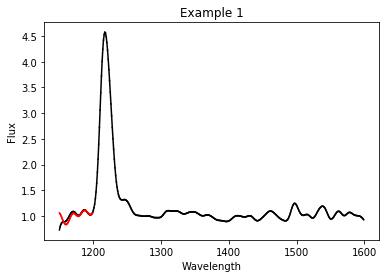

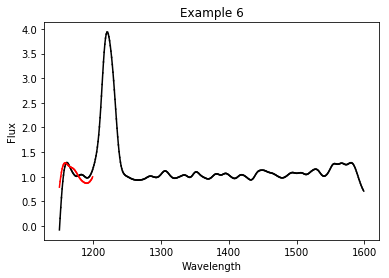

In [139]:
draw_one_fr(light_lambdas, smoothed_test[0], test_est_left[0], "Example 1")
draw_one_fr(light_lambdas, smoothed_test[5], test_est_left[5], "Example 6")